In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 165)
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import floor
import os
import pickle
from sklearn.preprocessing import MinMaxScaler
import time
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
cat_list=[ 'location','location2','message','senor_type','lastSensorEventHours','lastSensorDayOfWeek','prevDominantSensor1','prevDominantSensor2','lastSensorID','lastSensorLocation','lastMotionLocation']
num_list=[ 'lastSensorEventSeconds','windowDuration','timeSinceLastSensorEvent','complexity','activityChange','areaTransitions','sensorCount-Bathroom','sensorCount-Bedroom','sensorCount-Chair','sensorCount-DiningRoom','sensorCount-Hall','sensorCount-Ignore','sensorCount-Kitchen','sensorCount-LivingRoom','sensorCount-Office','sensorCount-OutsideDoor','sensorCount-WorkArea','sensorElTime-Bathroom','sensorElTime-Bedroom','sensorElTime-Chair','sensorElTime-DiningRoom','sensorElTime-Hall','sensorElTime-Ignore','sensorElTime-Kitchen','sensorElTime-LivingRoom','sensorElTime-Office','sensorElTime-OutsideDoor','sensorElTime-WorkArea']

In [3]:
X_train=pd.read_csv(r'model_dataset\X_train_sample_1.csv')
y_train=pd.read_csv(r'model_dataset\y_train_sample_1.csv')
X_test=pd.read_csv(r'model_dataset\X_test_sample_1.csv')
y_test=pd.read_csv(r'model_dataset\y_test_sample_1.csv')

### Label Encoding

In [7]:
# le_dict={}
# for x in (cat_list):
#     le_dict[x] = LabelEncoder()
#     le_dict[x].fit(X_train[x])
# #     X_train[x]=le_dict[x].transform(X_train[x])
# le_dict['target']=LabelEncoder()
# le_dict['target'].fit(y_train['target'])
# y_train['target']=le_dict['target'].transform(y_train['target'])
# file = open('label_encoder.pkl', 'wb')
# pickle.dump(le_dict, file)
# file.close()
file = open('label_encoder.pkl', 'rb')
le_dict = pickle.load(file)
file.close()
for x in (cat_list):
    X_train[x]=le_dict[x].transform(X_train[x])
y_train['target']=le_dict['target'].transform(y_train['target'])
for x in (cat_list):
    X_test[x]=le_dict[x].transform(X_test[x])
y_test['target']=le_dict['target'].transform(y_test['target'])

### Decision Tree

In [76]:
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42) 
dt_model = dt.fit(X_train, y_train)
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
file = open('dt_model.pkl', 'wb')
pickle.dump(dt_model, file)
file.close()
file = open('dt_model.pkl', 'rb')
dt_model = pickle.load(file)
file.close()

--- 52.23446750640869 seconds --- 0.8705744584401448 mins ---


In [77]:
start_time = time.time()
dt_train_pred=dt_model.predict(X_train)
dt_test_pred=dt_model.predict(X_test)
dt_train_pred=le_dict['target'].inverse_transform(dt_train_pred)
dt_test_pred=le_dict['target'].inverse_transform(dt_test_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
start_time = time.time()
print(classification_report(np.array(y_train),dt_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
start_time = time.time()
print(classification_report(np.array(y_test),dt_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 1.279104471206665 seconds --- 0.021318407853444417 mins ---
                  precision    recall  f1-score   support

             Eat       1.00      1.00      1.00     24980
      Enter_Home       1.00      1.00      1.00      9148
Entertain_Guests       1.00      1.00      1.00    106237
   Getting_ready       1.00      1.00      1.00     82266
      Leave_Home       1.00      1.00      1.00     12054
           Other       1.00      1.00      1.00    225404
   Prep_for_meal       1.00      1.00      1.00    201787
           Sleep       1.00      1.00      1.00     62950
              TV       1.00      1.00      1.00     57305
        Washroom       1.00      1.00      1.00    138908
            Work       1.00      1.00      1.00     78961

        accuracy                           1.00   1000000
       macro avg       1.00      1.00      1.00   1000000
    weighted avg       1.00      1.00      1.00   1000000

--- 25.179543495178223 seconds --- 0.4196590582529704 mins ---


### Random Forest

In [78]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42)
rf_model=rf.fit(X_train, y_train)
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
file = open('rf_model.pkl', 'wb')
pickle.dump(rf_model, file)
file.close()
file = open('rf_model.pkl', 'rb')
rf_model = pickle.load(file)
file.close()
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))

C:\Users\daksh\AppData\Local\Temp\ipykernel_8284\2633563838.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model=rf.fit(X_train, y_train)


--- 580.2365465164185 seconds --- 9.670609108606975 mins ---
--- 580.2365465164185 seconds --- 9.670609108606975 mins ---


In [80]:
start_time = time.time()
rf_train_pred=rf_model.predict(X_train)
rf_test_pred=rf_model.predict(X_test)
rf_test_pred=le_dict['target'].inverse_transform(rf_test_pred)
rf_train_pred=le_dict['target'].inverse_transform(rf_train_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),rf_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),rf_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 99.95683646202087 seconds --- 1.6659472743670145 mins ---
                  precision    recall  f1-score   support

             Eat       1.00      1.00      1.00     24980
      Enter_Home       1.00      1.00      1.00      9148
Entertain_Guests       1.00      1.00      1.00    106237
   Getting_ready       1.00      1.00      1.00     82266
      Leave_Home       1.00      1.00      1.00     12054
           Other       1.00      1.00      1.00    225404
   Prep_for_meal       1.00      1.00      1.00    201787
           Sleep       1.00      1.00      1.00     62950
              TV       1.00      1.00      1.00     57305
        Washroom       1.00      1.00      1.00    138908
            Work       1.00      1.00      1.00     78961

        accuracy                           1.00   1000000
       macro avg       1.00      1.00      1.00   1000000
    weighted avg       1.00      1.00      1.00   1000000

--- 123.68962621688843 seconds --- 2.0614937702814737 mins ---
  

### Hyper Parameter Tuning Random Forest

In [9]:

from sklearn.model_selection import RandomizedSearchCV

start_time = time.time()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 5)]
max_depth = [int(x) for x in np.linspace(20, 750, num = 5)]
max_depth.append(None)
min_samples_split = [2, 10,20]
min_samples_leaf = [1, 10, 20]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'criterion':['gini','entropy']}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=3, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
file = open('rf_random.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()
file = open('rf_random.pkl', 'rb')
rf_random = pickle.load(file)
file.close()

rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_depth': None,
 'criterion': 'entropy'}

In [7]:
start_time = time.time()
rf_random_train_pred=rf_random.predict(X_train)
rf_random_test_pred=rf_random.predict(X_test)
rf_random_train_pred=le_dict['target'].inverse_transform(rf_random_train_pred)
rf_random_test_pred=le_dict['target'].inverse_transform(rf_random_test_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),rf_random_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),rf_random_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])


                  precision    recall  f1-score   support

             Eat       0.86      0.51      0.64      24980
      Enter_Home       0.89      0.87      0.88       9148
Entertain_Guests       0.91      0.65      0.76     106237
   Getting_ready       0.82      0.58      0.68      82266
      Leave_Home       0.80      0.66      0.72      12054
           Other       0.77      0.81      0.79     225404
   Prep_for_meal       0.86      0.98      0.91     201787
           Sleep       0.91      0.87      0.89      62950
              TV       0.79      0.77      0.78      57305
        Washroom       0.80      0.98      0.88     138908
            Work       0.82      0.81      0.82      78961

        accuracy                           0.82    1000000
       macro avg       0.84      0.77      0.80    1000000
    weighted avg       0.83      0.82      0.82    1000000

--- 200.84013175964355 seconds --- 3.3473355293273928 mins ---
                  precision    recall  f1-score  

In [22]:

random_grid= {'n_estimators': [int(x) for x in np.linspace(start = 400, stop = 1500, num = 5)],
 'min_samples_split': [int(x) for x in np.linspace(20, 750, num = 5)]}
rf = RandomForestClassifier(min_samples_leaf=10,criterion='entropy')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=3, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
file = open('rf_random.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()
file = open('rf_random.pkl', 'rb')
rf_random = pickle.load(file)
file.close()

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\daksh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


--- 4208.026674747467 seconds --- 70.13377791245779 mins ---


{'n_estimators': 400, 'min_samples_split': 20}

In [30]:
start_time = time.time()
# rf_tuned = RandomForestClassifier(min_samples_leaf=10,criterion='entropy',random_state=42,n_estimators= 400, min_samples_split= 20)
# rf_tuned_model=rf_tuned.fit(X_train, y_train)
# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# file = open('rf_tuned_model.pkl', 'wb')
# pickle.dump(rf_tuned_model, file)
# file.close()
file = open('rf_tuned_model.pkl', 'rb')
rf_tuned_model = pickle.load(file)
file.close()
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))

--- 4510.764212608337 seconds --- 75.17940354347229 mins ---


In [27]:
start_time = time.time()
rf_tuned_train_pred=rf_tuned_model.predict(X_train)
rf_tuned_test_pred=rf_tuned_model.predict(X_test)
rf_tuned_train_pred=le_dict['target'].inverse_transform( rf_tuned_train_pred)
rf_tuned_test_pred=le_dict['target'].inverse_transform( rf_tuned_test_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train), rf_tuned_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test), rf_tuned_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 382.98511576652527 seconds --- 6.383085262775421 mins ---
                  precision    recall  f1-score   support

             Eat       0.92      0.71      0.81     33199
      Enter_Home       0.90      0.91      0.90     12137
Entertain_Guests       0.94      0.82      0.88    141105
   Getting_ready       0.91      0.77      0.83    108727
      Leave_Home       0.83      0.73      0.78     15990
           Other       0.84      0.84      0.84    298445
   Prep_for_meal       0.91      0.99      0.95    267746
           Sleep       0.93      0.93      0.93     83520
              TV       0.85      0.87      0.86     75925
        Washroom       0.89      0.98      0.93    184062
            Work       0.89      0.87      0.88    104612

        accuracy                           0.89   1325468
       macro avg       0.89      0.86      0.87   1325468
    weighted avg       0.89      0.89      0.89   1325468

--- 416.6172020435333 seconds --- 6.943620034058889 mins ---
    

### OneVsRest

In [8]:
from sklearn.multiclass import OneVsRestClassifier

start_time = time.time()
# rf = RandomForestClassifier(random_state=42)
# ovr_model = OneVsRestClassifier(rf)
# ovr_model = ovr_model.fit(X_train, y_train)

# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# file = open('ovr_model.pkl', 'wb')
# pickle.dump(ovr_model, file)
# file.close()
file = open('ovr_model.pkl', 'rb')
ovr_model = pickle.load(file)
file.close()
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))

--- 2570.091039419174 seconds --- 42.834850656986234 mins ---
--- 2627.955619573593 seconds --- 43.79926032622655 mins ---


In [8]:
start_time = time.time()
ovr_train_pred=ovr_model.predict(X_train)
ovr_test_pred=ovr_model.predict(X_test)
ovr_train_pred=le_dict['target'].inverse_transform(ovr_train_pred)
ovr_test_pred=le_dict['target'].inverse_transform(ovr_test_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),ovr_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),ovr_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])


--- 364.5840549468994 seconds --- 6.076400915781657 mins ---
                  precision    recall  f1-score   support

             Eat       0.90      0.73      0.81     33199
      Enter_Home       0.90      0.91      0.90     12137
Entertain_Guests       0.92      0.84      0.88    141105
   Getting_ready       0.89      0.79      0.83    108727
      Leave_Home       0.87      0.69      0.78     15990
           Other       0.82      0.85      0.84    298445
   Prep_for_meal       0.91      0.99      0.95    267746
           Sleep       0.93      0.93      0.93     83520
              TV       0.85      0.87      0.86     75925
        Washroom       0.91      0.95      0.93    184062
            Work       0.89      0.87      0.88    104612

        accuracy                           0.89   1325468
       macro avg       0.89      0.86      0.87   1325468
    weighted avg       0.89      0.89      0.89   1325468
    
--- 378.7481036186218 seconds --- 6.312468393643697 mins ---


### OneVsOne

In [8]:
from sklearn.multiclass import OneVsOneClassifier

start_time = time.time()
# rf = RandomForestClassifier(random_state=42)
# ovo_rf_model = OneVsOneClassifier(rf)
# ovo_rf_model = ovo_rf_model.fit(X_train, y_train)

# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# file = open('ovo_rf_model.pkl', 'wb')
# pickle.dump(ovo_rf_model, file)
# file.close()
file = open('ovo_rf_model.pkl', 'rb')
ovo_rf_model = pickle.load(file)
file.close() 
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 588.1793038845062 seconds --- 9.802988398075104 mins ---
--- 592.6986780166626 seconds --- 9.87831130027771 mins ---


In [2]:
start_time = time.time()
ovo_rf_train_pred=ovo_rf_model.predict(X_train)
ovo_rf_test_pred=ovo_rf_model.predict(X_test)
ovo_rf_train_pred=le_dict['target'].inverse_transform(ovo_rf_train_pred)
ovo_rf_test_pred=le_dict['target'].inverse_transform(ovo_rf_test_pred)
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),ovo_rf_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),ovo_rf_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])


--- 874.4103000164032 seconds --- 14.573505000273387 mins ---
                  precision    recall  f1-score   support

             Eat       0.92      0.71      0.81     33199
      Enter_Home       0.90      0.91      0.90     12137
Entertain_Guests       0.94      0.82      0.88    141105
   Getting_ready       0.91      0.77      0.83    108727
      Leave_Home       0.83      0.73      0.78     15990
           Other       0.84      0.84      0.84    298445
   Prep_for_meal       0.91      0.99      0.95    267746
           Sleep       0.93      0.93      0.93     83520
              TV       0.85      0.87      0.86     75925
        Washroom       0.89      0.98      0.93    184062
            Work       0.89      0.87      0.88    104612

        accuracy                           0.89   1325468
       macro avg       0.89      0.86      0.87   1325468
    weighted avg       0.89      0.89      0.89   1325468

--- 880.1528959274292 seconds --- 14.66921493212382 mins ---
   

### XGBoost

In [6]:
# start_time = time.time()
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_test, label=y_test)
# watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# xgb_pars = {'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.3, 'max_depth': 10, 'subsample': 0.9, 'lambda': 1.0, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'merror', 'silent': 1, 'objective': 'multi:softmax','num_class':11}
# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# xgb_model = xgb.train(xgb_pars, dtrain, 2000, watchlist, early_stopping_rounds=50,
#                   maximize=False, verbose_eval=10)
# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# file = open('xgb_model.pkl', 'wb')
# pickle.dump(xgb_model, file)
# file.close()
file = open('xgb_model.pkl', 'rb')
xgb_model = pickle.load(file)
file.close()

--- 1.3741986751556396 seconds --- 0.022903311252593993 mins ---
[00:35:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\daksh\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-merror:0.34465	valid-merror:0.34698
[10]	train-merror:0.27853	valid-merror:0.28242
[20]	train-merror:0.26287	valid-merror:0.26801
[30]	train-merror:0.25663	valid-merror:0.26230
[40]	train-merror:0.24947	valid-merror:0.25573
[50]	train-merror:0.24290	valid-merror:0.24980
[60]	train-merror:0.23633	valid-merror:0.24385
[70]	train-merror:0.23047	valid-merror:0.23835
[80]	train-merror:0.22447	valid-merror:0.23331
[90]	train-merror:0.21874	valid-merror:0.22850
[100]	train-merror:0.21374	valid-merror:0.22425
[110]	train-merror:0.20905	valid-merror:0.22004
[120]	train-merror:0.20487	valid-merror:0.21675
[130]	train-merror:0.20035	valid-merror:0.21289
[140]	train-merror:0.19631	valid-merror:0.20958
[150]	train-merror:0.19241	valid-merror:0.20623
[160]	train-merror:0.18851	valid-merror:0.20296
[170]	train-merror:0.18547	valid-merror:0.20050
[180]	train-merror:0.18247	valid-merror:0.19838
[190]	train-merror:0.17952	valid-merror:0.19605
[200]	train-merror:0.17667	valid-merror:0.19360
[21

[1700]	train-merror:0.04555	valid-merror:0.10685
[1710]	train-merror:0.04523	valid-merror:0.10666
[1720]	train-merror:0.04490	valid-merror:0.10645
[1730]	train-merror:0.04464	valid-merror:0.10630
[1740]	train-merror:0.04438	valid-merror:0.10618
[1750]	train-merror:0.04403	valid-merror:0.10604
[1760]	train-merror:0.04381	valid-merror:0.10593
[1770]	train-merror:0.04346	valid-merror:0.10568
[1780]	train-merror:0.04317	valid-merror:0.10556
[1790]	train-merror:0.04282	valid-merror:0.10536
[1800]	train-merror:0.04244	valid-merror:0.10512
[1810]	train-merror:0.04215	valid-merror:0.10497
[1820]	train-merror:0.04187	valid-merror:0.10476
[1830]	train-merror:0.04163	valid-merror:0.10456
[1840]	train-merror:0.04136	valid-merror:0.10440
[1850]	train-merror:0.04107	valid-merror:0.10416
[1860]	train-merror:0.04072	valid-merror:0.10396
[1870]	train-merror:0.04042	valid-merror:0.10383
[1880]	train-merror:0.04020	valid-merror:0.10375
[1890]	train-merror:0.03998	valid-merror:0.10351
[1900]	train-merror:

In [7]:
start_time = time.time()
xgb_train_pred=xgb_model.predict(xgb.DMatrix(X_train))
xgb_test_pred=xgb_model.predict(xgb.DMatrix(X_test))
xgb_test_pred=le_dict['target'].inverse_transform(xgb_test_pred.astype('int'))
xgb_train_pred=le_dict['target'].inverse_transform(xgb_train_pred.astype('int'))
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),xgb_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),xgb_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 642.9386918544769 seconds --- 10.715644864241282 mins ---
                  precision    recall  f1-score   support

             Eat       0.98      0.97      0.97     33886
      Enter_Home       1.00      1.00      1.00     12424
Entertain_Guests       0.97      0.98      0.98    143875
   Getting_ready       0.95      0.92      0.94    110896
      Leave_Home       0.99      0.97      0.98     16310
           Other       0.96      0.91      0.94    304592
   Prep_for_meal       0.96      1.00      0.98    273266
           Sleep       0.98      0.98      0.98     85253
              TV       0.95      0.96      0.95     77452
        Washroom       0.97      0.99      0.98    187813
            Work       0.96      0.96      0.96    106701

        accuracy                           0.96   1352468
       macro avg       0.97      0.97      0.97   1352468
    weighted avg       0.96      0.96      0.96   1352468

--- 675.2690832614899 seconds --- 11.25448472102483 mins ---
    

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Gain', ylabel='Features'>

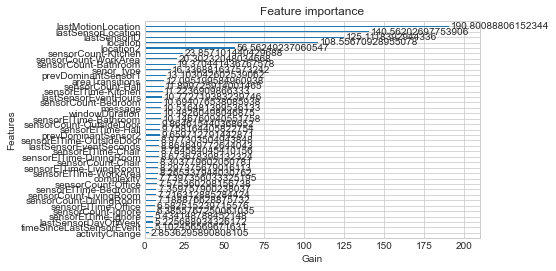

In [10]:
xgb.plot_importance(xgb_model, importance_type = 'gain', xlabel = 'Gain')

### Used the below code for hyper parameter tuning

In [ ]:
FOREVER_COMPUTING_FLAG = False
xgb_pars = []
for MCW in [10, 20, 50, 75, 100]:
    for ETA in [0.05, 0.1, 0.15]:
        for CS in [0.3, 0.4, 0.5]:
            for MD in [6, 8, 10, 12, 15]:
                for SS in [0.5, 0.6, 0.7, 0.8, 0.9]:
                    for LAMBDA in [0.5, 1., 1.5,  2., 3.]:
                        xgb_pars.append({'min_child_weight': MCW, 'eta': ETA, 
                                         'colsample_bytree': CS, 'max_depth': MD,
                                         'subsample': SS, 'lambda': LAMBDA, 
                                         'nthread': -1, 'booster' : 'gbtree', 'eval_metric': 'merror',
                                         'silent': 1, 'objective': 'multi:softmax','num_class':11})
while FOREVER_COMPUTING_FLAG:
    xgb_par = np.random.choice(xgb_pars, 1)[0]
    print(xgb_par)
    xgb_model = xgb.train(xgb_par, dtrain, 2000, watchlist, early_stopping_rounds=50,
                      maximize=False, verbose_eval=100)
    print('Modeling RMSLE %.5f' % model.best_score)

##### @4k epoch

In [6]:
# start_time = time.time()
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalid = xgb.DMatrix(X_test, label=y_test)
# watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# xgb_pars = {'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.3, 'max_depth': 10, 'subsample': 0.9, 'lambda': 1.0, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'merror', 'silent': 1, 'objective': 'multi:softmax','num_class':11}
# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# xgb_model = xgb.train(xgb_pars, dtrain, 4000, watchlist, early_stopping_rounds=50,
#                   maximize=False, verbose_eval=10)
# print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
# file = open('xgb_model2.pkl', 'wb')
# pickle.dump(xgb_model, file)
# file.close()
file = open('xgb_model2.pkl', 'rb')
xgb_model = pickle.load(file)
file.close()

--- 1.3664519786834717 seconds --- 0.02277419964472453 mins ---
[21:11:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\daksh\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-merror:0.34465	valid-merror:0.34698
[10]	train-merror:0.27853	valid-merror:0.28242
[20]	train-merror:0.26287	valid-merror:0.26801
[30]	train-merror:0.25663	valid-merror:0.26230
[40]	train-merror:0.24947	valid-merror:0.25573
[50]	train-merror:0.24290	valid-merror:0.24980
[60]	train-merror:0.23633	valid-merror:0.24385
[70]	train-merror:0.23047	valid-merror:0.23835
[80]	train-merror:0.22447	valid-merror:0.23331
[90]	train-merror:0.21874	valid-merror:0.22850
[100]	train-merror:0.21374	valid-merror:0.22425
[110]	train-merror:0.20905	valid-merror:0.22004
[120]	train-merror:0.20487	valid-merror:0.21675
[130]	train-merror:0.20035	valid-merror:0.21289
[140]	train-merror:0.19631	valid-merror:0.20958
[150]	train-merror:0.19241	valid-merror:0.20623
[160]	train-merror:0.18851	valid-merror:0.20296
[170]	train-merror:0.18547	valid-merror:0.20050
[180]	train-merror:0.18247	valid-merror:0.19838
[190]	train-merror:0.17952	valid-merror:0.19605
[200]	train-merror:0.17667	valid-merror:0.19360
[21

[1700]	train-merror:0.04555	valid-merror:0.10685
[1710]	train-merror:0.04523	valid-merror:0.10666
[1720]	train-merror:0.04490	valid-merror:0.10645
[1730]	train-merror:0.04464	valid-merror:0.10630
[1740]	train-merror:0.04438	valid-merror:0.10618
[1750]	train-merror:0.04403	valid-merror:0.10604
[1760]	train-merror:0.04381	valid-merror:0.10593
[1770]	train-merror:0.04346	valid-merror:0.10568
[1780]	train-merror:0.04317	valid-merror:0.10556
[1790]	train-merror:0.04282	valid-merror:0.10536
[1800]	train-merror:0.04244	valid-merror:0.10512
[1810]	train-merror:0.04215	valid-merror:0.10497
[1820]	train-merror:0.04187	valid-merror:0.10476
[1830]	train-merror:0.04163	valid-merror:0.10456
[1840]	train-merror:0.04136	valid-merror:0.10440
[1850]	train-merror:0.04107	valid-merror:0.10416
[1860]	train-merror:0.04072	valid-merror:0.10396
[1870]	train-merror:0.04042	valid-merror:0.10383
[1880]	train-merror:0.04020	valid-merror:0.10375
[1890]	train-merror:0.03998	valid-merror:0.10351
[1900]	train-merror:

[3380]	train-merror:0.01564	valid-merror:0.08770
[3390]	train-merror:0.01555	valid-merror:0.08761
[3400]	train-merror:0.01546	valid-merror:0.08762
[3410]	train-merror:0.01536	valid-merror:0.08749
[3420]	train-merror:0.01526	valid-merror:0.08745
[3430]	train-merror:0.01517	valid-merror:0.08740
[3440]	train-merror:0.01510	valid-merror:0.08730
[3450]	train-merror:0.01501	valid-merror:0.08724
[3460]	train-merror:0.01491	valid-merror:0.08716
[3470]	train-merror:0.01479	valid-merror:0.08705
[3480]	train-merror:0.01469	valid-merror:0.08700
[3490]	train-merror:0.01460	valid-merror:0.08692
[3500]	train-merror:0.01452	valid-merror:0.08688
[3510]	train-merror:0.01443	valid-merror:0.08686
[3520]	train-merror:0.01434	valid-merror:0.08682
[3530]	train-merror:0.01424	valid-merror:0.08675
[3540]	train-merror:0.01418	valid-merror:0.08674
[3550]	train-merror:0.01410	valid-merror:0.08670
[3560]	train-merror:0.01399	valid-merror:0.08662
[3570]	train-merror:0.01390	valid-merror:0.08656
[3580]	train-merror:

In [7]:
start_time = time.time()
xgb_train_pred=xgb_model.predict(xgb.DMatrix(X_train))
xgb_test_pred=xgb_model.predict(xgb.DMatrix(X_test))
xgb_test_pred=le_dict['target'].inverse_transform(xgb_test_pred.astype('int'))
xgb_train_pred=le_dict['target'].inverse_transform(xgb_train_pred.astype('int'))
y_train=pd.DataFrame(le_dict['target'].inverse_transform(y_train),columns=['target'])
y_test=pd.DataFrame(le_dict['target'].inverse_transform(y_test),columns=['target'])
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_train),xgb_train_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
print(classification_report(np.array(y_test),xgb_test_pred))
print("--- %s seconds --- %s mins ---" % ((time.time() - start_time), (time.time() - start_time)/60))
y_train['target']=le_dict['target'].transform(y_train['target'])
y_test['target']=le_dict['target'].transform(y_test['target'])

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daksh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 1284.9992034435272 seconds --- 21.416653390725454 mins ---
                  precision    recall  f1-score   support

             Eat       1.00      1.00      1.00     33886
      Enter_Home       1.00      1.00      1.00     12424
Entertain_Guests       0.99      1.00      1.00    143875
   Getting_ready       0.98      0.98      0.98    110896
      Leave_Home       1.00      1.00      1.00     16310
           Other       0.99      0.97      0.98    304592
   Prep_for_meal       0.98      1.00      0.99    273266
           Sleep       0.99      1.00      0.99     85253
              TV       0.99      0.99      0.99     77452
        Washroom       0.99      1.00      1.00    187813
            Work       0.99      0.99      0.99    106701

        accuracy                           0.99   1352468
       macro avg       0.99      0.99      0.99   1352468
    weighted avg       0.99      0.99      0.99   1352468

--- 1324.3171083927155 seconds --- 22.071951806545258 mins ---
 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Gain', ylabel='Features'>

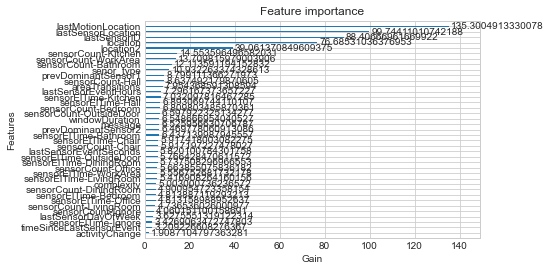

In [8]:
xgb.plot_importance(xgb_model, importance_type = 'gain', xlabel = 'Gain')